# Extracting Table from PDF file

In [271]:
# pip3 install jupyter
# pip3 install camelot-py
# pip3 install seaborn
import camelot.io as cm #to fix error -> conda install ghostscript
import os

In [1]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: B652-0BE0

 Directorio de c:\Users\avr_h\Documents\Practicas Programacion\Python\Python\Automation\Scrapping

08/07/2022  04:03    <DIR>          .
08/07/2022  04:03    <DIR>          ..
08/07/2022  03:16    <DIR>          __pycache__
08/07/2022  03:39             9.569 extract_important_info.ipynb
08/07/2022  03:26    <DIR>          files
08/07/2022  01:44            57.940 pdf_table_extraction.ipynb
08/07/2022  03:16            10.094 pdf2txt.py
06/07/2022  02:47             3.064 scrapping_news_to_email.py
08/07/2022  03:10             8.368 spacy_practice.ipynb
06/07/2022  03:57             1.524 ted_talk_downloader.py
               6 archivos         90.559 bytes
               4 dirs  25.077.530.624 bytes libres


In [273]:
# Option 1 -> URL
#input_pdf = cm.read_pdf("url")

# Option 2 -> file
# flavor can be -> stream or lattice
input_pdf = cm.read_pdf(os.getcwd() + "\\files\\table.pdf", flavor="lattice", pages='all')

In [274]:
input_pdf # Visalize

<TableList n=1>

In [275]:
for element in input_pdf:
    print (element)

<Table shape=(6, 6)>


In [276]:
df = input_pdf[0].df.loc[2: , :] # Get all rows but headers and all columns
df # Visualize

,0,1,2,3,4,5
2,Blind,5,1,4,"34.5%, n=1","1199 sec, n=1"
3,Low Vision,5,2,3,"98.3% n=2 \n(97.7%, n=3)","1716 sec, n=3 \n(1934 sec, n=2)"
4,Dexterity,5,4,1,"98.3%, n=4","1672.1 sec, n=4"
5,Mobility,3,3,0,"95.4%, n=3","1416 sec, n=3"


In [277]:
df = df.reset_index(drop= True)
df.columns = ["Disability Category", "Participants", "Ballots Completed", "Ballots Incomplete/Terminated", "Results - Accuracy", "Results - Time to complete"] # set columns names
df[["Participants", "Ballots Completed", "Ballots Incomplete/Terminated"]] = df[["Participants", "Ballots Completed", "Ballots Incomplete/Terminated"]].astype(int) # parse to integer
df[["Results - Accuracy", "Results - Time to complete"]] = df[["Results - Accuracy", "Results - Time to complete"]].replace("\n", "", regex= True) # format string
df = df.set_index("Disability Category") # set the index the first column
df

,Participants,Ballots Completed,Ballots Incomplete/Terminated,Results - Accuracy,Results - Time to complete
Disability Category,,,,,
Blind,5,1,4,"34.5%, n=1","1199 sec, n=1"
Low Vision,5,2,3,"98.3% n=2 (97.7%, n=3)","1716 sec, n=3 (1934 sec, n=2)"
Dexterity,5,4,1,"98.3%, n=4","1672.1 sec, n=4"
Mobility,3,3,0,"95.4%, n=3","1416 sec, n=3"


In [278]:
# Export
df.to_csv(os.getcwd() + "\\files\\csv_copy.csv", sep= ";")
df.to_excel(os.getcwd() + "\\files\\excel_copy.xlsx")

# Bonus Track - Data Visualitation

In [279]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [280]:
dataFrame = pd.read_csv(os.getcwd() + "\\files\\csv_copy.csv", sep= ";")
dataFrame

,Disability Category,Participants,Ballots Completed,Ballots Incomplete/Terminated,Results - Accuracy,Results - Time to complete
0,Blind,5,1,4,"34.5%, n=1","1199 sec, n=1"
1,Low Vision,5,2,3,"98.3% n=2 (97.7%, n=3)","1716 sec, n=3 (1934 sec, n=2)"
2,Dexterity,5,4,1,"98.3%, n=4","1672.1 sec, n=4"
3,Mobility,3,3,0,"95.4%, n=3","1416 sec, n=3"


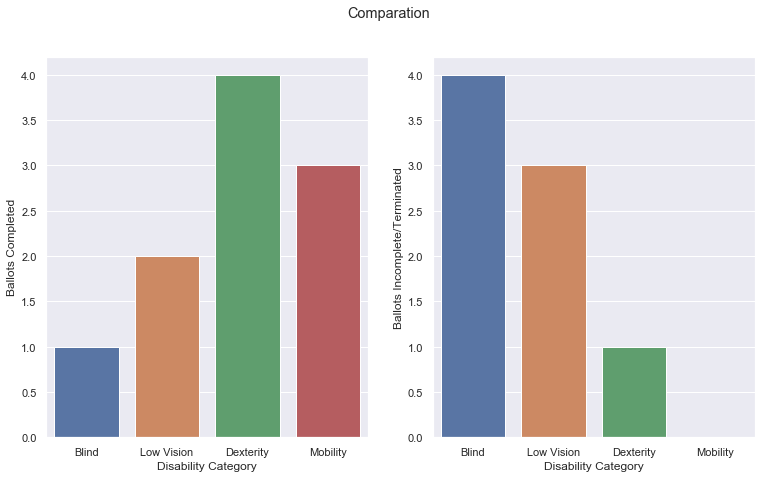

In [294]:
fig, axs = plt.subplots(ncols=2)
sns.barplot(x='Disability Category', y="Ballots Completed", data=dataFrame, ax=axs[0])
sns.barplot(x='Disability Category', y="Ballots Incomplete/Terminated", data=dataFrame, ax=axs[1])
sns.set(rc={'figure.figsize':(12.7, 7)})
#sns.set_context("talk")
fig.suptitle("Comparation")
plt.show()

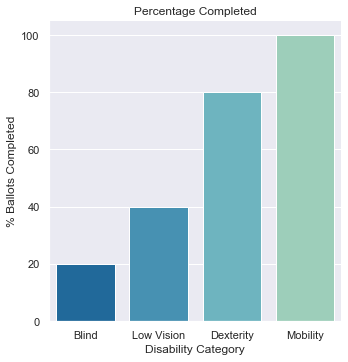

In [292]:
# Create new column
dataFrame["% Ballots Completed"] = dataFrame["Ballots Completed"] / dataFrame["Participants"] * 100

sns.catplot(x='Disability Category', y="% Ballots Completed", data=dataFrame, kind='bar').set(title="Percentage Completed")
sns.set_style("darkgrid")
sns.set_palette("GnBu_r")
# sns.set_context("paper")
# plt.xticks(rotation = 90)
plt.show()